# Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
df = pd.read_csv("music.csv")
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [2]:
X = df.drop(columns=["genre"])
y = df["genre"]
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

Predict what genre a 21 year old male would like (21, 1)

In [3]:
model.predict([[21,1]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

In [4]:
model.predict([[21,1], [22,0]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

## Training and testing

Split the dataset.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Returns a tuple
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score


0.75

## Saving a model

In [7]:
import joblib
joblib.dump(model, "genre-recommender.joblib")

model = joblib.load("genre-recommender.joblib")
model.predict([[21,1]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

## Visualize tree

In [8]:
from sklearn import tree
tree.export_graphviz(model, out_file="genre-recommender.dot", feature_names=["age","gender"], class_names=sorted(y.unique()), label="all", rounded=True, filled=True)

[Text(0.625, 0.875, 'age <= 30.5\ngini = 0.724\nsamples = 14\nvalue = [1, 6, 3, 2, 2]'),
 Text(0.5, 0.625, 'gender <= 0.5\ngini = 0.719\nsamples = 8\nvalue = [1, 0, 3, 2, 2]'),
 Text(0.25, 0.375, 'age <= 25.5\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.75, 0.375, 'age <= 27.0\ngini = 0.5\nsamples = 4\nvalue = [0, 0, 0, 2, 2]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]')]

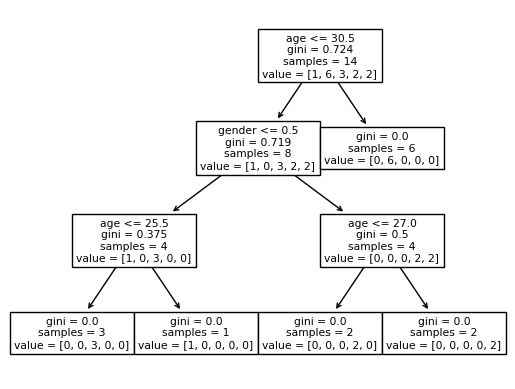

In [9]:
tree.plot_tree(model, feature_names=["age","gender"], label="all")